In this problem we estimate the behavior of a city’s water network, where fresh water is supplied by a desalination plant, and consumed at various points in the network. The network contains various consumers, and various reservoirs where water is locally stored.

Our objective is to use noisy information about production and consumption levels, and noisy measurements of the amount of water in the reservoirs, to estimate the state of the network. 

Let $k$ be a time index, and let $d(k)$ be the fresh water produced by the desalination plant at time $k$. Each city district $i$ has a reservoir with current level $r_i(k)$, and the district consumes a quantity of water $c_i(k)$. We model the consumption as evolving as $c(k)=c(k-1)+n(k-1)$, where $n(k-1)$ is a zero-mean random variable, which is white and independent of all other quantities. At each time step, we receive a noisy measurement $z_i(k)=r_i(k)+w_i(k)$ of the reservoir level $r_i(k)$, where $w_i(k)$ is the measurement error (with $w$ zero-mean, white, and independent of all other quantities).

The reservoirs are connected in a network, and an automatic balancing system is in place that pumps water between the reservoirs. If two reservoirs $i$ and $j$ are connected, there is a balancing ﬂow between them that is proportional to the diﬀerence in volume between the two, so that $f_{ij}(k)=\alpha(r_j(k)-r_i(k))$. Based on the real network, we can write the system dynamics as: 
$$
    x(k)=Ax(k-1)+u(k-1)+v(k-1)\\ 
    z(k)=Hx(k)+w(k)
$$
where $x(k)=[r_1(k)\enspace r_2(k)\enspace r_3(k)\enspace r_4(k)\enspace c_1(k)\enspace c_2(k)\enspace c_3(k)\enspace c_4(k)]^T$ is the state, $u(k)=[d(k)\enspace 0\enspace 0\enspace ...]^T$ is the input, $v(k)=[0\enspace 0\enspace ...\enspace n_1(k)\enspace n_2(k)\enspace n_3(k)\enspace n_4(k)]^T$ is the process noise, $z(k)=[z_1(k)\enspace z_2(k)\enspace z_3(k)\enspace z_4(k)]^T$ is the measurement, $w(k)=[w_1(k)\enspace w_2(k)\enspace w_3(k)\enspace w_4(k)]^T$ is the measurement noise,   
$A=\begin{bmatrix} {1-2\alpha} & \alpha & \alpha & 0 & -1 & 0 & 0 & 0 \\ \alpha & {1-2\alpha} & \alpha & 0 & 0 & -1 & 0 & 0 \\ \alpha & \alpha & {1-3\alpha} & \alpha & 0 & 0 & -1 & 0 \\ 0 & 0 & \alpha & {1-\alpha} & 0 & 0 & 0 & -1 \\ 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \end{bmatrix}$, $H=\begin{bmatrix} 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\end{bmatrix}$.   
Our sensor uncertainty is $Var[w_i(k)]=25$ for all tanks, and the consumption uncertainty is $Var[n_i(k)]=0.1$ for all consumers. Model the consumers as independent but identically distributed; also model the sensors as independent but identically distributed.

We want to design a Kalman filter to estimate the level of all the tanks, and the consumption levels. Run the Kalman ﬁlter for ten steps, with the following problem data:

tank number $i$ |1 |2 |3 |4
:-----:|:-----:|:-----:|:-----:|:-----:
$E[r_i(0)]$|20|40|60|20
$Var[r_i(0)]$|20|20|20|20
$E[c_i(0)]$|7|7|7|7
$Var[c_i(0)]$|1|1|1|1

The desalination plant delivers a constant supply of water, so that $d(k)=30$ for all $k\geq0$. The balancing is done with $\alpha=0.3$. 

We receive the following sequence of measurements $z_i(k)$: 

time step $k$|1 |2 |3 |4 |5 |6 |7 |8 |9 |10
:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:
$z_1(k)$|62.6|70.3|73.5|77.2|73.2|94.2|87.4|89.7|90.4|94.2
$z_2(k)$|29.4|44.8|37.3|40.1|44.1|43.8|53.8|49.9|51.9|52.1
$z_3(k)$|35.9|38.8|25.9|39.|31.2|46.9|39.6|44.|42.5|54.2
$z_4(k)$|40.9|21.9|18.|8.8|23.9|17.2|18.6|22.|22.9|17.2

Using the Kalman ﬁlter, we plot the estimate of the actual volume of water $r_i$ for $k\in\{1,2,...,10\}$ for all tanks. We also plot the associated uncertainty on a separate graph.

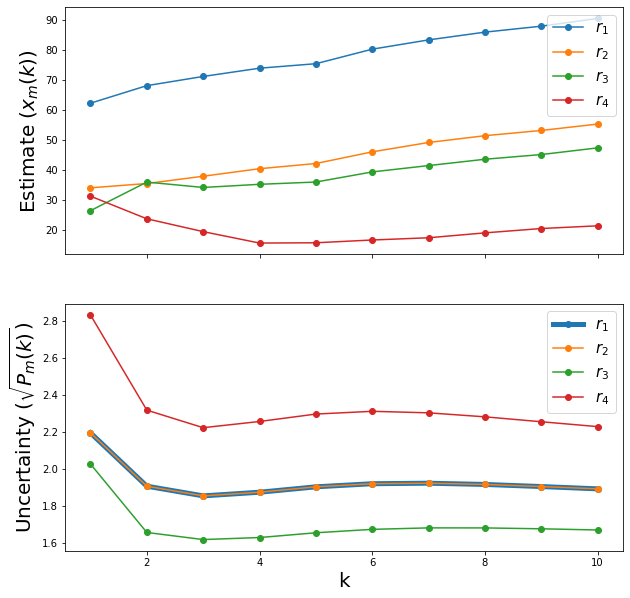

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problem statement
n = 8
m = 4

x0 = np.asarray([20, 40, 60, 20, 7, 7, 7, 7]).reshape(n, 1)
P0 = np.diag([20, 20, 20, 20, 1, 1, 1, 1])

d = 30
u = np.asarray([d, 0, 0, 0, 0, 0, 0, 0]).reshape(n, 1)

Sigma_vv = np.diag([0, 0, 0, 0, 0.1, 0.1, 0.1, 0.1])
Sigma_ww = np.diag([25, 25, 25, 25])

K = 10

alpha = 0.3
A = np.vstack((np.hstack((np.array([[1 - 2 * alpha, alpha, alpha, 0],
                         [alpha, 1 - 2 * alpha, alpha, 0],
                         [alpha, alpha, 1 - 3 * alpha, alpha],
                         [0, 0, alpha, 1 - alpha]]), - np.eye(4))), np.hstack((np.zeros((4, 4)), np.eye(4)))))
H = np.hstack((np.eye(4), np.zeros((4, 4))))

# Assign memory for estimates
xm = np.empty((K + 1, n, 1))
Pm = np.empty((K + 1, n, n))

# Measurements
z = np.array([[62.6, 70.3, 73.5, 77.2, 73.2, 94.2, 87.4, 89.7, 90.4, 94.2],
              [29.4, 44.8, 37.3, 40.1, 44.1, 43.8, 53.8, 49.9, 51.9, 52.1],
              [35.9, 38.8, 25.9, 39.0, 31.2, 46.9, 39.6, 44.0, 42.5, 54.2],
              [40.9, 21.9, 18.0, 8.8, 23.9, 17.2, 18.6, 22.0, 22.9, 17.2]])

# Initialization
xm[0] = x0
Pm[0] = P0

# Recursion
for k in range(K): 
    # Prior update
    xp = A @ xm[k] + u
    Pp = A @ Pm[k] @ A.T + Sigma_vv
    
    # Measurement update
    xm[k + 1] = xp + Pp @ H.T @ np.linalg.inv(H @ Pp @ H.T + Sigma_ww) @ (z[:, k].reshape(m, 1) - H @ xp)
    Pm[k + 1] = Pp - Pp @ H.T @ np.linalg.inv(H @ Pp @ H.T + Sigma_ww) @ H @ Pp
    
# Plot
fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
axs[0].plot(np.arange(1, K + 1), xm[1:, 0], 'o-', label = r'$r_1$')
axs[0].plot(np.arange(1, K + 1), xm[1:, 1], 'o-', label = r'$r_2$')
axs[0].plot(np.arange(1, K + 1), xm[1:, 2], 'o-', label = r'$r_3$')
axs[0].plot(np.arange(1, K + 1), xm[1:, 3], 'o-', label = r'$r_4$')
axs[0].legend(fontsize = 15)
axs[0].set_ylabel(r'Estimate ($x_m(k)$)', fontsize = 20)

axs[1].plot(np.arange(1, K + 1), np.sqrt(Pm[1:, 0, 0]), 'o-', linewidth =5, label = r'$r_1$')
axs[1].plot(np.arange(1, K + 1), np.sqrt(Pm[1:, 1, 1]), 'o-', label = r'$r_2$')
axs[1].plot(np.arange(1, K + 1), np.sqrt(Pm[1:, 2, 2]), 'o-', label = r'$r_3$')
axs[1].plot(np.arange(1, K + 1), np.sqrt(Pm[1:, 3, 3]), 'o-', label = r'$r_4$')
axs[1].legend(fontsize = 15)
axs[1].set_ylabel(r'Uncertainty ($\sqrt{P_m(k)}$)', fontsize = 20)

plt.xlabel('k', fontsize = 20)
plt.show()